In [1]:
!pip install pandasql
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=0f3cbdcb3a003e14a91a8866b132ca4ed03d6267432a3e89cfce799071b8b1e0
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 6.9 MB/s 
     |████████████████████████████████| 9.8 MB 40.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Importanto bibliotecas, realizando leitura do arquivo .csv e confirmando se de fato existem valores diferentes na coluna 'count'.

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
#!pip install pandasql
import pandasql
from sklearn.model_selection import train_test_split
# from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima

df = pd.read_csv('resultado-busca-phoenix.csv')

df['_id'] = pd.to_datetime(df['_id'])


# separa os dados em conjunto de treino e teste
treinamento, teste = train_test_split(df['count'], test_size=.30, shuffle=False)

In [3]:
# depois que vários modelos são criados, o melhor é selecionado
# execute esta parte do código separadamente, pois ela leva mais tempo
auto_arima_model = auto_arima(treinamento, d=1, D=1, seasonal=True, trace=True, stepwise=False, max_p=8, max_q=8, max_d=8, max_P=8, max_Q=8, max_D=8, start_p=0, start_q=0, start_d=0, start_P=0, start_Q=0, start_D=0)
print(auto_arima_model)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=568.957, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=394.822, Time=1.49 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=502.054, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=2.25 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=469.117, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=2.14 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=2.76 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=454.238, Time=0.32 sec
 ARI

Qualidade AIC:  391.81587521111993
Forecast: 
 312    1.089494
313    1.097377
314    1.096334
315    1.096842
316    1.096125
         ...   
441    1.096125
442    1.096125
443    1.096125
444    1.096125
445    1.096125
Name: predicted_mean, Length: 134, dtype: float64


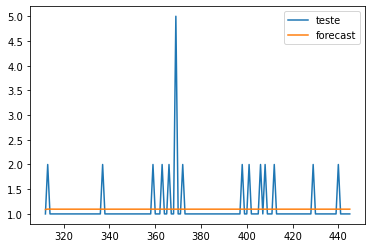

In [10]:
# o modelo superior é então aplicado ao sarimax
modelo_superior = sm.tsa.SARIMAX(treinamento, order=auto_arima_model.order).fit()

# qualidade do modelo ajustado com AIC:
print("Qualidade AIC: ", modelo_superior.aic)

# forecast

forecast = modelo_superior.forecast(steps=len(teste))
print('Forecast: \n', forecast)

teste.plot(label = 'teste')
forecast.plot(label = 'forecast')

plt.legend()
plt.show()


In [6]:
from sklearn.metrics import mean_absolute_error as mae

# Calculando 'mean_absolute_error' com sklearn
print('Erro médio absoluto: ', mae(teste, forecast))

# Printando desvio padrão
print('Desvio padrão: ', np.std(forecast))

Erro médio absoluto:  0.2028527344363802
Desvio padrão:  0.0005855728417645056
